In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing the dataset
data = pd.read_csv("test-set.csv")

In [4]:
#First ten observations
data.head(10)

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Category 6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Category 6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Category 6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Category 6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Category 6
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Category 4
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Category 6
7,459008,Female,Yes,47,Yes,Artist,1.0,Average,3.0,Category 6
8,459013,Male,Yes,50,Yes,Artist,2.0,Average,4.0,Category 6
9,459014,Male,No,19,No,Healthcare,0.0,Low,4.0,Category 6


##### The above table is an overview of the first ten observations in the dataset

In [4]:
#Finding the number of observations and variables
data.shape
print(f'There are {data.shape[0]} observations and {data.shape[-1]} variables')

There are 2627 observations and 10 variables


In [5]:
#Information on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      2627 non-null   int64  
 1   Gender          2627 non-null   object 
 2   Married         2577 non-null   object 
 3   Age             2627 non-null   int64  
 4   Graduated       2603 non-null   object 
 5   Profession      2589 non-null   object 
 6   WorkExperience  2358 non-null   float64
 7   SpendingScore   2627 non-null   object 
 8   FamilySize      2514 non-null   float64
 9   Category        2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


##### It can be seen that each variable is in their correct data type. That is, CustomerID and Age as integers, Gender, Married, Graduated, Profession, SpendingScore and Category as objects and WorkExperience and FamilySize as float

## Data Cleaning

In [6]:
#Checking for missing values
data.isna().sum()

CustomerID          0
Gender              0
Married            50
Age                 0
Graduated          24
Profession         38
WorkExperience    269
SpendingScore       0
FamilySize        113
Category           32
dtype: int64

##### The above shows that Married, Graduated, Profession, WorkExperience, FamilySize and Category all have missing values. We therefore proceed to fill the missing values

In [7]:
data.columns

Index(['CustomerID', 'Gender', 'Married', 'Age', 'Graduated', 'Profession',
       'WorkExperience', 'SpendingScore', 'FamilySize', 'Category'],
      dtype='object')

In [5]:
#Changing column headers to lowercase
data.columns = data.columns.str.lower()
data.head()

,customerid,gender,married,age,graduated,profession,workexperience,spendingscore,familysize,category
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Category 6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Category 6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Category 6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Category 6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Category 6


##### All variable names have been changed to lowercase for easier coding

In [9]:
#Checking the unique values for married variable
data.married.unique()

array(['Yes', 'No', nan], dtype=object)

##### Since married variable has an object data type, we fill missing values with the mode among the unique values

In [14]:
#Checking the mode of unique values
mode = data.married.mode()[0]
mode

'Yes'

In [15]:
#Imputing missing values
data.married.fillna(mode, inplace = True)

In [16]:
#Checking for missing values after inputting
data.married.isna().sum()

0

##### All missing values have been filled

In [17]:
#Checking unique values for graduated variable
data.graduated.unique()

array(['Yes', 'No', nan], dtype=object)

##### Since graduated has an object data type, we fill missing values with the mode

In [19]:
#Checking mode for graduated variable
mode = data.graduated.mode()[0]
mode

#Filling missing values with the mode
data.graduated.fillna(mode, inplace = True)

In [20]:
#Checking for missing values after inputting
data.graduated.isna().sum()

0

##### All missing values have been filled

In [21]:
#Checking for unique values for profession variable
data.profession.unique()

array(['Engineer', 'Healthcare', nan, 'Executive', 'Marketing', 'Doctor',
       'Artist', 'Lawyer', 'Entertainment', 'Homemaker'], dtype=object)

##### Since profession has an object data type, we fill missing values with the mode

In [23]:
#Checking the mode for profession variable
mode = data.profession.mode()[0]
mode

#Filling missing values with the mode
data.profession.fillna(mode, inplace = True)

In [24]:
#Checking missing values after inputting
data.profession.isna().sum()

0

In [25]:
data.isna().sum()

customerid          0
gender              0
married             0
age                 0
graduated           0
profession          0
workexperience    269
spendingscore       0
familysize        113
category           32
dtype: int64

##### As it can be seen above, all missing values for married, graduated and profession have been filled

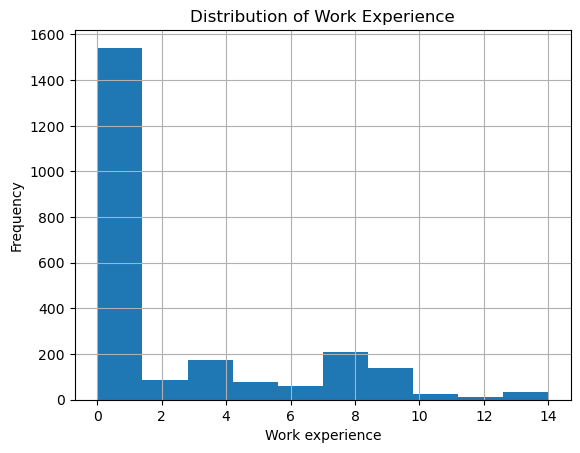

In [26]:
#Checking distribution of workexperience
data.workexperience.hist()
plt.xlabel('Work experience')
plt.ylabel('Frequency')
plt.title("Distribution of Work Experience");

##### Since the graph is right-skewed, the median will be used to fill missing values

In [27]:
#Finding median for workexperience
median = data['workexperience'].median()
median

1.0

##### The median is 1.0

In [28]:
#Filling missing values with the median
data.workexperience = data.workexperience.fillna(median)

In [29]:
# Checking missing values after filling
data.workexperience.isna().sum()

0

##### All missing values have been filled

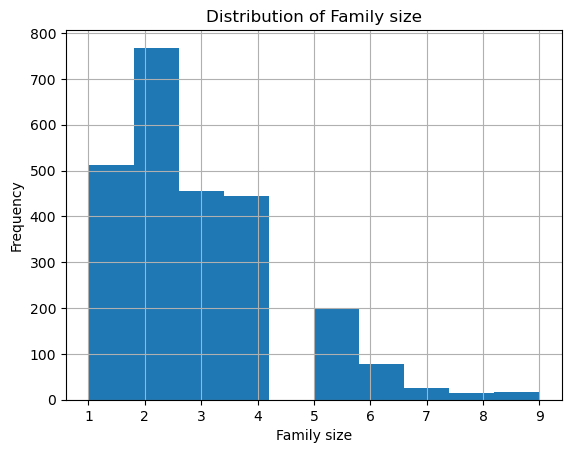

In [30]:
#Checking distribution  of familysize
data.familysize.hist()
plt.xlabel('Family size')
plt.ylabel('Frequency')
plt.title("Distribution of Family size");

##### Since the graph is right-skewed, the median will be used to fill missing values

In [31]:
#Finding median for familysize
median = data.familysize.median()
median

2.0

##### The median for familysize is 2.0

In [32]:
#Filling missing values with the median
data.familysize = data.familysize.fillna(median)

In [33]:
# Checking for missing values after inputting
data.familysize.isna().sum()

0

##### All missing values have been filled

In [34]:
# Checking unique values for category
data.category.unique()

array(['Category 6', 'Category 4', 'Category 3', nan, 'Category 1',
       'Category 2', 'Category 5', 'Category 7'], dtype=object)

##### Since category has an object data type, the mode will be used to fill missing values

In [35]:
# Finding the mode for category
mode = data.category.mode()[0]

#Filling missing values with the mode
data.category = data.category.fillna(mode)

In [36]:
#Checking missing values after inputting
data.category.isna().sum()

0

In [37]:
# Checking if all missing values have been inputted
data.isna().sum()

customerid        0
gender            0
married           0
age               0
graduated         0
profession        0
workexperience    0
spendingscore     0
familysize        0
category          0
dtype: int64

##### As it can be seen from the above data, all missing values in the dataset has been filled

In [38]:
#Checking for duplicated observations 
data.duplicated().sum()

0

##### Since there are no duplicated values, we proceed to analyse the data

## Exploratory Data Analysis

In [39]:
# Value count of Gender variable
data.gender.value_counts()

gender
Male      1424
Female    1203
Name: count, dtype: int64

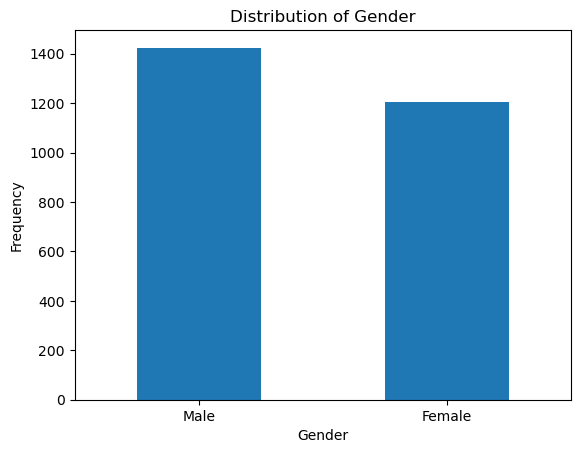

In [40]:
# Plotting a bar chart of gender
data.gender.value_counts().plot.bar()
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Distribution of Gender")
plt.xticks(rotation=0);

##### This bar chart shows that there are more males than females

In [41]:
# Value count of married variable
data.married.value_counts()

married
Yes    1570
No     1057
Name: count, dtype: int64

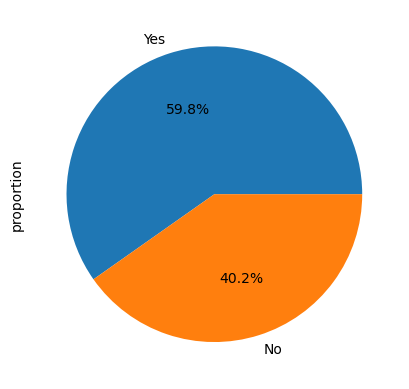

In [42]:
# Plotting a pie chart of married variable 
data.married.value_counts(normalize = True).plot.pie(autopct = "%1.1f%%");

##### This chart shows that there is a higher proportion of married individual than unmarried individual

In [43]:
# Value count of graduated vaiable
data.graduated.value_counts()

graduated
Yes    1626
No     1001
Name: count, dtype: int64

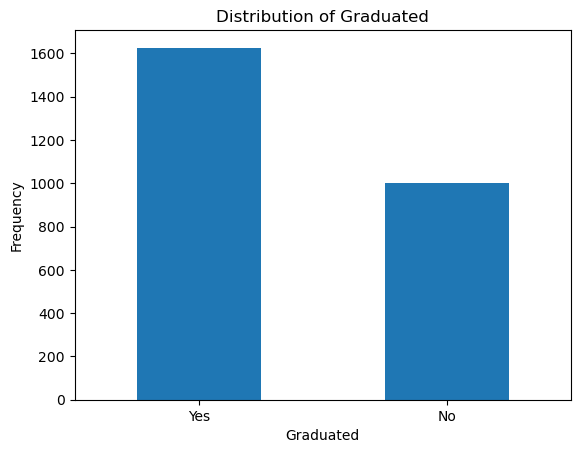

In [44]:
# Plotting a bar chart of graduated variable
data.graduated.value_counts().plot.bar()
plt.xlabel("Graduated")
plt.ylabel("Frequency")
plt.title("Distribution of Graduated")
plt.xticks(rotation=0);

##### The graph shows that most customers are graduated

In [45]:
# Value count of profession
data.profession.value_counts().to_frame()

,count
profession,
Artist,840
Healthcare,418
Entertainment,301
Doctor,242
Engineer,236
Lawyer,221
Executive,176
Marketing,111
Homemaker,82


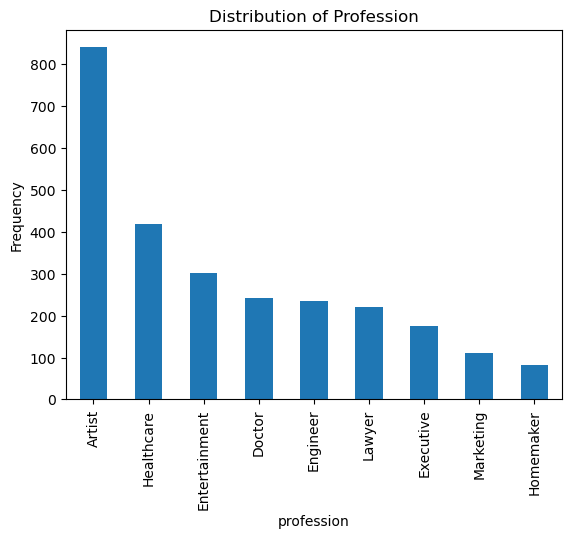

In [46]:
# Plotting a bar chart of profession
data.profession.value_counts().plot.bar()
plt.xlabel("profession")
plt.ylabel("Frequency")
plt.title("Distribution of Profession")
plt.xticks(rotation=90);

##### The graph shows that the profession persued by most customers is Artist with Homemaker being the least among all professions

In [47]:
#Value count of spending score
data.spendingscore.value_counts()

spendingscore
Low        1616
Average     625
High        386
Name: count, dtype: int64

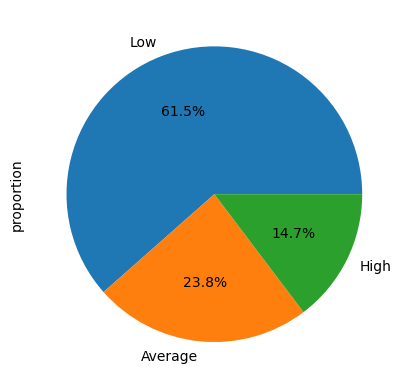

In [48]:
#Plotting a pie chart of spending score
data.spendingscore.value_counts(normalize = True).plot.pie(autopct = "%1.1f%%");

##### The chart above shows that most customers have a low spending score while a small proportion have a high spending score

In [49]:
# Finding central tendencies and quartiles of numerical variables
data.drop('customerid', axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
age,2627.0,43.649791,16.967015,18.0,30.0,41.0,53.0,89.0
workexperience,2627.0,2.393605,3.200165,0.0,0.0,1.0,3.0,14.0
familysize,2627.0,2.789874,1.527360,1.0,2.0,2.0,4.0,9.0


##### The table above shows the central tendencies and quartiles of age, workexperience and familysize

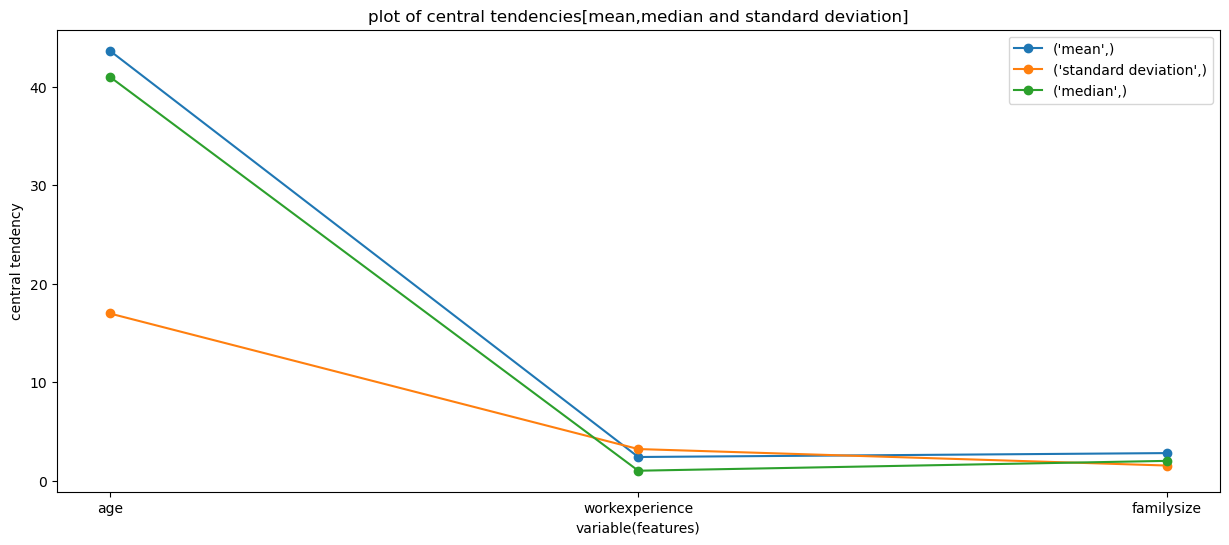

In [50]:
# Plotting central tendencies
data_statistics = data.drop('customerid', axis=1).describe().T
central_tendencies=data_statistics[['mean','std', '50%']]
central_tendencies.columns = [['mean', 'standard deviation','median']]
plt.subplots(figsize=(15,6))
plt.plot(central_tendencies, label = central_tendencies.columns , marker ='o')
plt.xlabel("variable(features)")
plt.ylabel("central tendency")
plt.title("plot of central tendencies[mean,median and standard deviation]")
plt.legend();

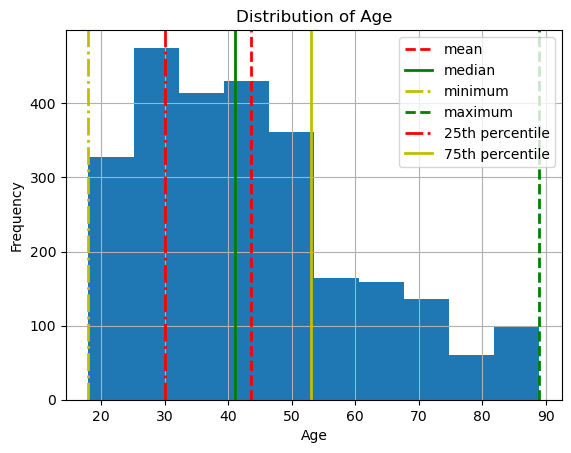

In [51]:
# Plotting a histogram of age variable
data.age.hist()
mean = data.age.mean()
median = data.age.median()
minimum = data.age.min()
maximum = data.age.max()
percentile_25 = data.age.quantile(0.25)
percentile_75 = data.age.quantile(0.75)
plt.axvline(mean, color = 'r', linewidth=2, linestyle='--', label= 'mean')
plt.axvline(median, color = 'g', linewidth=2, linestyle='-', label= 'median')
plt.axvline(minimum, color = 'y', linewidth=2, linestyle='-.', label= 'minimum')
plt.axvline(maximum, color = 'g', linewidth=2, linestyle='--', label= 'maximum')
plt.axvline(percentile_25, color = 'r', linewidth=2, linestyle='-.', label= '25th percentile')
plt.axvline(percentile_75, color = 'y', linewidth=2, linestyle='-', label= '75th percentile')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.legend();

##### Since the data is right skewed, it can be seen from the graph that the mean is higher than the median. It can also be seen that 75 percent of the customers are below 53 years inclusive. 25 percent of customers are not more than 30 years and the maximum age of customers is 89. 

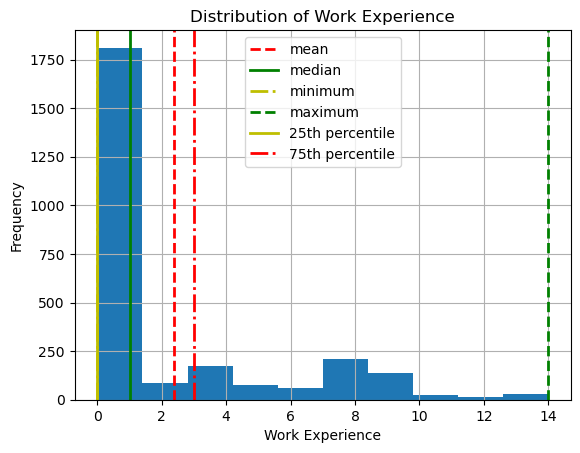

In [52]:
# Plotting a histogram of workexperience variable
data.workexperience.hist()
mean = data.workexperience.mean()
median = data.workexperience.median()
minimum = data.workexperience.min()
maximum = data.workexperience.max()
percentile_25 = data.workexperience.quantile(0.25)
percentile_75 = data.workexperience.quantile(0.75)
plt.axvline(mean, color = 'r', linewidth=2, linestyle='--', label= 'mean')
plt.axvline(median, color = 'g', linewidth=2, linestyle='-', label= 'median')
plt.axvline(minimum, color = 'y', linewidth=2, linestyle='-.', label= 'minimum')
plt.axvline(maximum, color = 'g', linewidth=2, linestyle='--', label= 'maximum')
plt.axvline(percentile_25, color = 'y', linewidth=2, linestyle='-', label= '25th percentile')
plt.axvline(percentile_75, color = 'r', linewidth=2, linestyle='-.', label= '75th percentile')
plt.xlabel("Work Experience")
plt.ylabel("Frequency")
plt.title("Distribution of Work Experience")
plt.legend();

##### Since the data is right skewed, it can be seen from the graph that the mean is higher than the median. It can also be seen that 25 percent of customers have zero work experience. 75 percent of customers have work experience of 4 years and below. The maximum work experience of customers is 14 years.

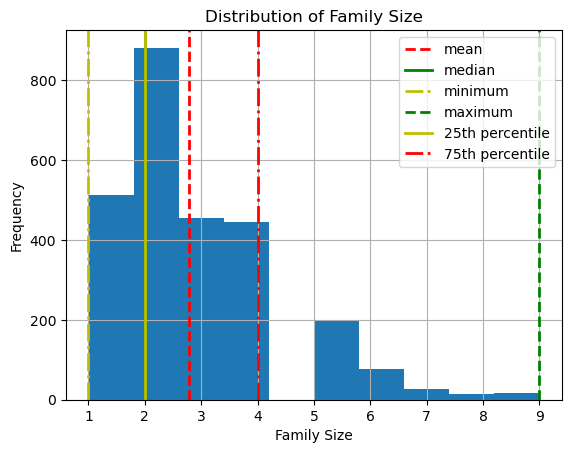

In [53]:
# Plotting a histogram of familysize variable
data.familysize.hist()
mean = data.familysize.mean()
median = data.familysize.median()
minimum = data.familysize.min()
maximum = data.familysize.max()
percentile_25 = data.familysize.quantile(0.25)
percentile_75 = data.familysize.quantile(0.75)
plt.axvline(mean, color = 'r', linewidth=2, linestyle='--', label= 'mean')
plt.axvline(median, color = 'g', linewidth=2, linestyle='-', label= 'median')
plt.axvline(minimum, color = 'y', linewidth=2, linestyle='-.', label= 'minimum')
plt.axvline(maximum, color = 'g', linewidth=2, linestyle='--', label= 'maximum')
plt.axvline(percentile_25, color = 'y', linewidth=2, linestyle='-', label= '25th percentile')
plt.axvline(percentile_75, color = 'r', linewidth=2, linestyle='-.', label= '75th percentile')
plt.xlabel("Family Size")
plt.ylabel("Frequency")
plt.title("Distribution of Family Size")
plt.legend();

##### Since the data is right skewed, it can be seen from the graph that the mean is higher than the median. It can also be seen that 25 percent of customers have family size of 2 and below. 75 percent of customers have family size of 4 years and below. The maximum family size of customers is 9. The table shows that family size has a median of 2.0 which is the same as the 25th percentile. This explains why the median is not seen on the graph.


In [54]:
central_tendencies.columns = [['mean', 'standard deviation','median']]
central_tendencies

,mean,standard deviation,median
age,43.649791,16.967015,41.0
workexperience,2.393605,3.200165,1.0
familysize,2.789874,1.527360,2.0


In [55]:
# Correlation between numerical variables
cor=data[['age','workexperience','familysize']].corr()
cor

,age,workexperience,familysize
age,1.000000,-0.177003,-0.276102
workexperience,-0.177003,1.000000,-0.062073
familysize,-0.276102,-0.062073,1.000000


##### The table above shows the correlation among the numerical variables

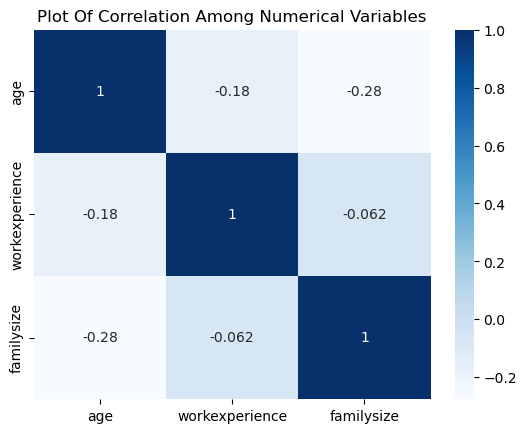

In [56]:
# Plotting the correlation of the numerical features
sns.heatmap(cor,cmap = 'Blues', annot=True);
plt.title("Plot Of Correlation Among Numerical Variables");

There is a very weak negative correlation between age and work experience. This means that as the age increases, work experience of the customer decreases but very weakly

There is a weak negative correlation between age and family size. This means that as the age increases, family size of the customer decreases but weakly

There is a very weak correlation between work experience and family size. This means that as work experience increases, family size of the customer decreases but weakly

In [57]:
# Group average workexperience by Gender
data.groupby('gender')['workexperience'].mean().to_frame()

,workexperience
gender,
Female,2.619285
Male,2.202949


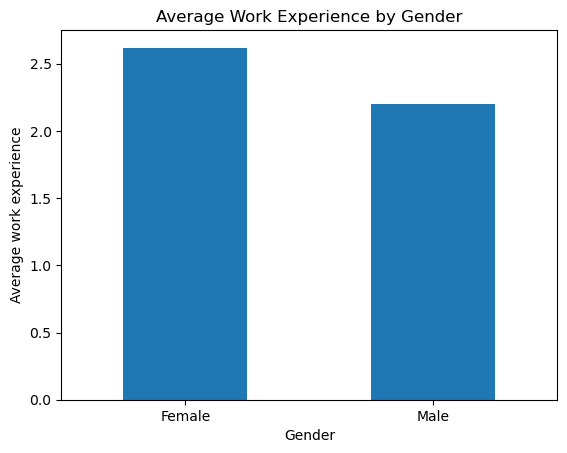

In [58]:
# Plotting average workexperience by gender
data.groupby('gender')['workexperience'].mean().plot.bar()
plt.xlabel("Gender")
plt.ylabel("Average work experience")
plt.title("Average Work Experience by Gender")
plt.xticks(rotation=0);

##### It can clearly be seen from the graph that on the average, females have a much higher work experience than males

In [59]:
# Group average Age  by Gender
data.groupby('gender')['age'].mean().to_frame()

,age
gender,
Female,43.462178
Male,43.808287


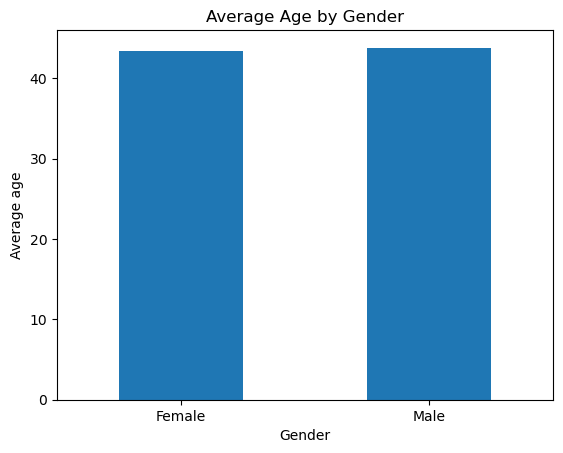

In [60]:
# plotting average age by gender
data.groupby('gender')['age'].mean().plot.bar()
plt.xlabel("Gender")
plt.ylabel("Average age")
plt.title("Average Age by Gender")
plt.xticks(rotation=0);

##### It can clearly be seen from the graph that on the average, female and male customers are of almost the same age

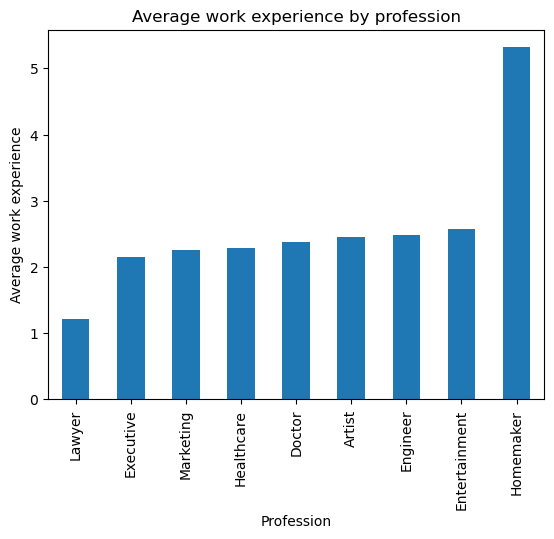

In [61]:
# Plotting Average work experience by profession
data.groupby('profession')['workexperience'].mean().sort_values().plot.bar()
plt.xlabel("Profession")
plt.ylabel("Average work experience")
plt.title("Average work experience by profession")
plt.xticks(rotation=90);

##### It can be seen from the graph that customers of the Homemaker profession have the highest work experience among all the customers with lawyers being the least.

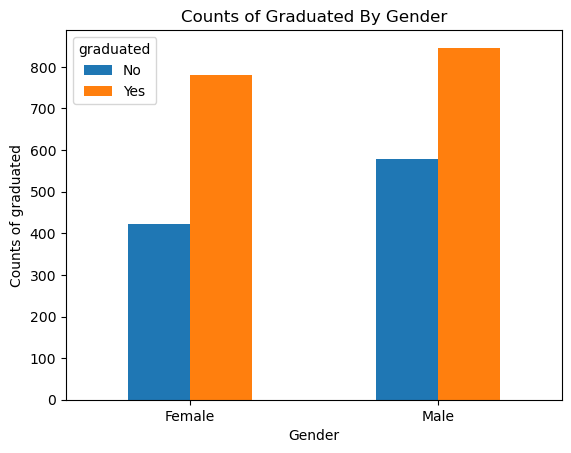

In [62]:
# Ploting the graduated distribution by gender
data.groupby('gender')['graduated'].value_counts().unstack().plot.bar()
plt.xlabel("Gender")
plt.ylabel("Counts of graduated")
plt.title('Counts of Graduated By Gender')
plt.xticks(rotation=0);

##### The graph shows that among both male and female customers, there are more graduates than non-graduates

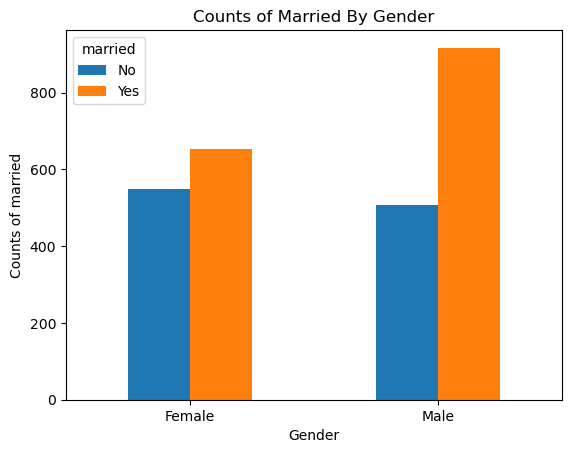

In [77]:
data.groupby('gender')['married'].value_counts().unstack().plot.bar()
plt.xlabel("Gender")
plt.ylabel("Counts of married")
plt.title('Counts of Married By Gender')
plt.xticks(rotation=0);

##### It can be seen from the graph above that among both male and female customers, there are more married individuals than unmarried.

In [63]:
data.groupby('gender')['profession'].value_counts().unstack()

profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
gender,,,,,,,,,
Female,409,116,184,85,8,162,67,113,59
Male,431,126,52,216,168,256,15,108,52


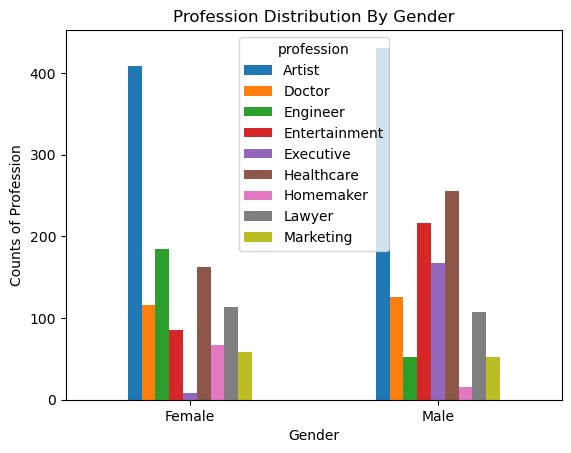

In [64]:
# Plotting profession distribution by gender
data.groupby('gender')['profession'].value_counts().unstack().plot.bar()
plt.xlabel("Gender")
plt.ylabel("Counts of Profession")
plt.title('Profession Distribution By Gender')
plt.xticks(rotation=0);

The above graph shows that;
1. There are more male artists than females artists.           
2. There are more male doctors than female artists.
3. There are more female engineers than male engineers.
4. There are more male in entertainment than there are females.
5. There are more male healthcare personnels than there are females.
6. There are more male executives than female executives.
7. There are more female homemakers than male homemakers.
8. There are more female lawyers than male lawyers.
9. There are more female marketing personnels than there are males.

In [65]:
# Extracting the data of married males who are artist
data[(data['gender']=='Male') & (data['married']=='Yes') & (data['profession']=='Artist')]

,customerid,gender,married,age,graduated,profession,workexperience,spendingscore,familysize,category
8,459013,Male,Yes,50,Yes,Artist,2.0,Average,4.0,Category 6
12,459024,Male,Yes,50,Yes,Artist,1.0,Average,5.0,Category 6
17,459039,Male,Yes,45,Yes,Artist,1.0,Average,2.0,Category 6
18,459041,Male,Yes,55,Yes,Artist,8.0,Low,1.0,Category 6
31,459083,Male,Yes,63,Yes,Artist,9.0,Average,3.0,Category 6
...,...,...,...,...,...,...,...,...,...,...
2575,467806,Male,Yes,55,Yes,Artist,1.0,High,2.0,Category 6
2582,467838,Male,Yes,60,Yes,Artist,0.0,Average,2.0,Category 6
2586,467856,Male,Yes,58,Yes,Artist,0.0,Low,2.0,Category 6
2600,467894,Male,Yes,57,Yes,Artist,1.0,Average,2.0,Category 6


The above table is a table of male artist who are married. It shows that 323 individuals fall into this category.

In [66]:
data[(data['age']>=40) & (data['married']=='No') & (data['profession']=='Homemaker')]

,customerid,gender,married,age,graduated,profession,workexperience,spendingscore,familysize,category
182,459538,Female,No,49,Yes,Homemaker,13.0,Low,1.0,Category 6
927,462096,Female,No,41,Yes,Homemaker,1.0,Low,1.0,Category 4
2240,466644,Female,No,51,Yes,Homemaker,0.0,Low,2.0,Category 6


The table above shows unmarried homemakers above the age of 40 years

In [67]:
data[(data['gender']=='Female') & (data['graduated']=='Yes') & (data['spendingscore']=='Low')]

,customerid,gender,married,age,graduated,profession,workexperience,spendingscore,familysize,category
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Category 6
15,459033,Female,Yes,61,Yes,Artist,0.0,Low,1.0,Category 6
27,459074,Female,No,29,Yes,Healthcare,0.0,Low,4.0,Category 4
35,459100,Female,No,61,Yes,Artist,11.0,Low,1.0,Category 6
52,459150,Female,No,48,Yes,Doctor,0.0,Low,1.0,Category 6
...,...,...,...,...,...,...,...,...,...,...
2618,467946,Female,Yes,42,Yes,Artist,0.0,Low,2.0,Category 6
2621,467950,Female,No,35,Yes,Entertainment,1.0,Low,2.0,Category 6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Category 6
2624,467960,Female,No,53,Yes,Entertainment,1.0,Low,2.0,Category 6


The table above shows female graduates with a low spending score.